## Sentiment Analysis


---


#### Sentiment analysis using 5 different classical NLP techniques
<br>

---
<br>

Techniques Used:
 1. TextBlob <br>
    a. Default method <br>
    b. NaiveBayesClassifier <br>
    c. Pattern analyzer <br>
 2. Word dictionary based
 3. Using pre-trained models (VADER)
 4. Named Entity based (Targetted)
 5. Custom trained 

<br>    
   
---
<br>


## 1. TextBlob

<br>



In [151]:
#!pip install -U textblob

In [152]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

In [153]:
text1 = 'Wuhan CoronaVirus Pictures that China does not want you to see Corona Update'     # news headline
text2 = 'now the question is who will make China pay for the death sorrow destruction and disruption'   # top comments
text3 = 'cries and mourning of millions of people will haunt China for sure.'   # top comments


#### a. Default Method

In [154]:
blob = TextBlob(text1)
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [155]:
blob = TextBlob(text2)
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [156]:
blob = TextBlob(text3)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.8888888888888888)

#### b. Naive Bayes

In [165]:
blob = TextBlob(text1, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8025964603466035, p_neg=0.1974035396533971)

In [158]:
blob = TextBlob(text2, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9528212793210686, p_neg=0.04717872067892939)

In [159]:
blob = TextBlob(text3, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.775269396124171, p_neg=0.22473060387583094)

#### c. Pattern Analyzer (the default method)

In [162]:
blob = TextBlob(text3, analyzer=PatternAnalyzer())
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.8888888888888888)

## 2. Word-Dictionary based

<br>

In [102]:
pos_words = []
neg_words = []

#Ignoring neutral, both, and other polarities
with open('data/subjclueslen1-HLTEMNLP05.tff') as file:
    for line in file:
        line_attrib = line.split()
        word = line_attrib[2].split('=')[1] #2nd column in the file
        polarity = line_attrib[-1].split('=')[1] #last column in the file
        if polarity =='positive':
            pos_words.append(word)
        elif polarity=='negative':
            neg_words.append(word)
            
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

#Write results to file for future use
with open('pos_words.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(pos_words))
with open('neg_words.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(neg_words))

Total positive words found:  2718
Total negative words found:  4911


In [103]:
pos_word_add = ['lifted', 'peace']
for term in pos_word_add:
    pos_words.append(term)

neg_word_add = ['Taliban', 'war', 'Wuhan CoronaVirus', 'CoronaVirus', 'Corona', 'coronavirus','covid','corona','covid19','pandemic','lockdown']
for term in neg_word_add:
    neg_words.append(term)
    
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

Total positive words found:  2720
Total negative words found:  4922


In [104]:
import nltk
def calc_sentiment_based_on_word_dict(text):
    sentiment_score = 0
    words = nltk.word_tokenize(text)
    for word in words:
        if word in pos_words:
            print('pos:',word)
            sentiment_score=sentiment_score+1
        if word in neg_words:
            print('neg:',word)
            sentiment_score=sentiment_score-1
    return sentiment_score/len(words)

In [105]:
sentiment = calc_sentiment_based_on_word_dict(text1)
print('The sentiment score of this text is: {:.2f}'.format(sentiment))

neg: CoronaVirus
pos: want
neg: Corona
The sentiment score of this text is: -0.08


In [106]:
sentiment = calc_sentiment_based_on_word_dict(text2)
print('The sentiment score of this text is: {:.2f}'.format(sentiment))

pos: will
neg: death
neg: sorrow
neg: destruction
neg: disruption
The sentiment score of this text is: -0.19


In [107]:
sentiment = calc_sentiment_based_on_word_dict(text3)
print('The sentiment score of this text is: {:.2f}'.format(sentiment))

pos: will
neg: haunt
pos: sure
The sentiment score of this text is: 0.08


In [108]:
text4 = 'He added that Taliban have seized control of all areas restoring peace and normalcy in the war torn country'
sentiment = calc_sentiment_based_on_word_dict(text4)
print('The sentiment score of this text is: {:.2f}'.format(sentiment) )

neg: Taliban
pos: peace
neg: war
The sentiment score of this text is: -0.05


In [109]:
blob = TextBlob(text4, analyzer=PatternAnalyzer())
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [110]:
blob = TextBlob(text4, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9969839734765537, p_neg=0.0030160265234435817)

## 3. Using pre-trained models like VADER

In [111]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sent_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sent_obj.polarity_scores(sentence)
    
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

    print("Sentence Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")



# Driver code
if __name__ == "__main__" :
    
    print("\n1st Text 1 :")
    sentiment_scores(text1)

    print("\n2nd Text 2 :")
    sentiment_scores(text2)

    print("\n3rd Text 3 :")
    sentiment_scores(text3)



1st Text 1 :
Overall sentiment dictionary is :  {'neg': 0.092, 'neu': 0.908, 'pos': 0.0, 'compound': -0.0572}
sentence was rated as  9.2 % Negative
sentence was rated as  90.8 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

2nd Text 2 :
Overall sentiment dictionary is :  {'neg': 0.575, 'neu': 0.425, 'pos': 0.0, 'compound': -0.9313}
sentence was rated as  57.49999999999999 % Negative
sentence was rated as  42.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

3rd Text 3 :
Overall sentiment dictionary is :  {'neg': 0.446, 'neu': 0.43, 'pos': 0.124, 'compound': -0.7184}
sentence was rated as  44.6 % Negative
sentence was rated as  43.0 % Neutral
sentence was rated as  12.4 % Positive
Sentence Overall Rated As Negative


## 4. Named Entity based Sentiment Analysis


#### Named Entity Recognition SpaCy

In [121]:
#!pip install -U SpaCy


In [122]:
import spacy
from spacy import displacy
import pandas as pd

df = pd.read_csv("data\wion.txt")

nlp = spacy.load("en_core_web_sm")

def spacy_ner(text):
    text = text.replace('\n', ' ')
    doc = nlp(text)
    entities = []
    labels = []
    position_start = []
    position_end = []

    for ent in doc.ents:
        if ent.label_ in ['PERSON','ORG','GPE']:
            entities.append(ent)
            labels.append(ent.label_)
    return entities,labels

def fit_ner(df):
    """The dataframe should have a column named 'text'"""
    print('Fitting Spacy NER model...')
    ner = df['text'].apply(spacy_ner)
    ner_org = {}
    ner_per = {}
    ner_gpe = {}

    for x in ner:
        #print(list(x))
        for entity, label in zip(x[0],x[1]):
            #print(type(entity.text))
            if label =='ORG':
                ner_org[entity.text] = ner_org.get(entity.text,0) + 1
            elif label=='PERSON':
                ner_per[entity.text] = ner_per.get(entity.text,0) + 1
            else:
                ner_gpe[entity.text] = ner_gpe.get(entity.text,0) + 1

    return {'ORG':ner_org,'PER':ner_per,'GPE':ner_gpe}

In [123]:
import pandas as pd

news_df = pd.read_csv("data\wion.txt")
named_entities = fit_ner(news_df)


Fitting Spacy NER model...


#### Organization Named Entities

In [124]:
named_entities['ORG']

{'Wuhan CoronaVirus  Pictures': 1,
 'Taliban': 1,
 'Central China Floods Death': 1,
 'Mouse': 1}

#### Geopolitical Named Entities

In [125]:
named_entities['GPE']

{'China': 6,
 'US': 3,
 'Israel': 2,
 'Gaza': 2,
 'Kabul': 1,
 'Wuhan': 1,
 'Henan province': 1,
 'Australia': 1,
 'Afghanistan': 1,
 'India': 1}

####  Named Entities based Sentiment Analysis (Targetted)

Targetted by finding sentences containing the named entities and performing sentiment analysis on those sentences one by one.

In [126]:
from textblob import TextBlob
import nltk

def get_keyword_sentences(text,keyword):
    """Extract sentences containing the Named Entity/Keyword"""
    text = text.replace('\n', ' ')
    sentences = nltk.sent_tokenize(text)

    sent_of_interest = []
    for sent in sentences:
        if keyword in sent.lower():
            sent_of_interest.append(sent)
    return sent_of_interest if len(sent_of_interest)>0 else False


def get_sentiment(list_of_sent):
    """ Extract sentiment from a sentence using TextBlob Pattern Analyzer"""
    sentiment = 0
    count = 0

    if list_of_sent !=False:
        for sent in list_of_sent:
            blob = TextBlob(sent)
            sentiment += blob.sentiment.polarity
            count += len(sent)
    return sentiment/count if count!=0 else 0  

def extract_sentiment(df,keywords,top=10):
    """df: data for the cluster, keywords: ner for that cluster"""
    print('Extracting Sentiments using TextBlob...')
    keywords = sorted(keywords.items(),key=lambda x: x[1],reverse=True)
    sentiment_dict = {}
    for keyword,count in keywords[:top]:
        df['sentences'] = df['text'].apply(get_keyword_sentences,keyword=keyword.lower())
        keyword_sentiment = df['sentences'].apply(get_sentiment).sum()
        sentiment_dict[keyword] = keyword_sentiment
    return sentiment_dict

#### Geopolitical Entities according to their sentiments

In [127]:
keywords = named_entities['GPE']
sentiment_result_org = extract_sentiment(news_df,keywords,top=10)
sentiment_result_org
sorted(sentiment_result_org.items(),key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('Kabul', 0.0030120481927710845),
 ('US', 0.0026638629322774145),
 ('Israel', 0.0),
 ('Gaza', 0.0),
 ('Wuhan', 0.0),
 ('Henan province', 0.0),
 ('Australia', 0.0),
 ('Afghanistan', 0.0),
 ('China', -0.00203962703962704),
 ('India', -0.008483697372586262)]

#### Organizations according to their sentiments

In [128]:
keywords = named_entities['ORG']
sentiment_result_org = extract_sentiment(news_df,keywords,top=5)
sentiment_result_org
sorted(sentiment_result_org.items(),key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('Taliban', 0.0030120481927710845),
 ('Wuhan CoronaVirus  Pictures', 0.0),
 ('Central China Floods Death', 0.0),
 ('Mouse', 0.0)]

#### Dataset used for NER based sentiment analysis are the following News Headlines from the channel WION.

In [89]:
import pandas as pd
df = pd.read_csv("data\wion.txt")
df.values


array([['Wuhan CoronaVirus  Pictures that China does not want you to see  Corona Update'],
       ['This Syrian child  message to the world will break your heart'],
       ['What happened when Trump did not know he was already Some Unseen Footages  US President'],
       ['The interview China tried to hide Wuhan Coronavirus  Dr. Ai Fen'],
       ['Israel Palestinian clashes Thousands flee their homes in Gaza  Hamas World English News'],
       ['Violence escalates between Israel Gaza'],
       ["Ground Report Kabul first morning under Taliban rule Afghan's national flag lowered"],
       ['Israel Palestine clashes  Gaza Violence  Hamas Rocket Attacks World News'],
       ['WION Wideangle INDIA SOUTH CHINA Sea TROUBLED WATERS'],
       ['How China exported the virus  Wuhan coronavirus'],
       ['Central China Floods Death toll goes up to 33 thousands evacuated from Henan province'],
       ['Mouse plague in Australia'],
       ['Trump drops Largest Non Nuclear Bomb In Afghanistan'],
  

## 5. Custom Sentiment Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy

import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install mlxtend

In [3]:
import mlxtend
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [92]:
data = pd.read_csv("data\wion.txt")
data.shape
data.head()

,text
0,Wuhan CoronaVirus Pictures that China does no...
1,This Syrian child message to the world will b...
2,What happened when Trump did not know he was a...
3,The interview China tried to hide Wuhan Corona...
4,Israel Palestinian clashes Thousands flee thei...


In [93]:
data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(data)

                                                 text  polarity
0   Wuhan CoronaVirus  Pictures that China does no...  0.000000
1   This Syrian child  message to the world will b...  0.000000
2   What happened when Trump did not know he was a...  0.000000
3   The interview China tried to hide Wuhan Corona...  0.000000
4   Israel Palestinian clashes Thousands flee thei...  0.000000
5              Violence escalates between Israel Gaza  0.000000
6   Ground Report Kabul first morning under Taliba...  0.250000
7   Israel Palestine clashes  Gaza Violence  Hamas...  0.000000
8   WION Wideangle INDIA SOUTH CHINA Sea TROUBLED ... -0.500000
9     How China exported the virus  Wuhan coronavirus  0.000000
10  Central China Floods Death toll goes up to 33 ...  0.000000
11                          Mouse plague in Australia  0.000000
12  Trump drops Largest Non Nuclear Bomb In Afghan...  0.000000
13  US Election 2020 Results Donald Trump vs Joe B...  0.136364
14  A warning to Xi Jinping from China  

##### the above dataset is too small to be useful in this case, so we'll download comments  of a news channel video on Covid19

In [166]:
data = pd.read_csv("data\comment11.csv")
#data.shape
data.head()

,Comment
0,I can't even say china should be ashamed.becau...
1,Each nation should take action against China. ...
2,What a brave woman!!
3,Praying shes still alive. Salute to these brav...
4,"This is stupid because it was made in 2019 ,an..."


In [38]:
data['polarity'] = data['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

print(data)


                                              Comment  polarity
0   I can't even say china should be ashamed.becau...  0.000000
1   Each nation should take action against China. ...  0.125000
2                                What a brave woman!!  1.000000
3   Praying shes still alive. Salute to these brav...  0.450000
4   This is stupid because it was made in 2019 ,an... -0.800000
..                                                ...       ...
95  Why is everything a cover up. Why can't people...  0.136364
96  Be your brother's  keeper.  Stand up for each ... -0.125000
97  It has no characteristics of a vaccine.  But y...  0.000000
98  Why hasn’t the world asked China too pay compe... -0.055556
99  What I am interested in right now that why We ...  0.183929

[100 rows x 2 columns]


In [94]:
data = data.sample(frac=1).reset_index(drop=True)

data['pol_cat']  = 0    #categorical polarity

##### Continuous to categorical

In [41]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

data.head()


,Comment,polarity,pol_cat
0,"""Missing"" in China means ""tortured and murdere...",0.150000,1
1,Fauci enabled Communist Party cover-up of covid.,0.000000,-1
2,its completely true as all developed countries...,0.225000,1
3,Fauci lied. Millions died.,0.000000,-1
4,She got missing. I bet she they killed her. ...,-0.133333,-1


In [42]:
data['pol_cat'].value_counts()

-1    73
 1    27
Name: pol_cat, dtype: int64

##### Create separate dataframes for Negative,Positive & Neutral comments

In [43]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [49]:
data_pos.shape

(27, 3)

In [51]:
data_pos.head()

,Comment,polarity,pol_cat
0,"""Missing"" in China means ""tortured and murdere...",0.1500,1
1,its completely true as all developed countries...,0.2250,1
2,MISSING HUH?!! MORE LIKE SILENCED BY THE CHINE...,0.0625,1
3,Blaming yourself is better.,0.5000,1
4,What a brave woman!!,1.0000,1


In [52]:
data_neg.shape

(73, 3)

In [53]:
data_neg.head()

,Comment,polarity,pol_cat
0,Fauci enabled Communist Party cover-up of covid.,0.000000,-1
1,Fauci lied. Millions died.,0.000000,-1
2,She got missing. I bet she they killed her. ...,-0.133333,-1
3,🔥,0.000000,-1
4,CHINA BRING THIS DR BACK!!!!,0.000000,-1


In [56]:
data_neg['Comment'][40]

"Dead or n a camp they don't play about that snitch shit"

-1    73
 1    27
Name: pol_cat, dtype: int64

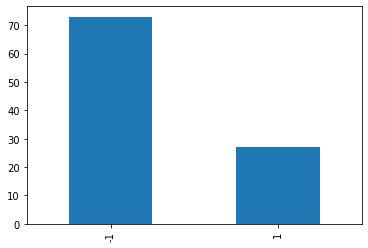

In [57]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

#### Data Preprocessing

In [58]:
data['Comment'] = data['Comment'].str.lower()

In [59]:
data['Comment'].head()

0    "missing" in china means "tortured and murdere...
1     fauci enabled communist party cover-up of covid.
2    its completely true as all developed countries...
3                           fauci lied. millions died.
4    she got missing. i bet she they  killed  her. ...
Name: Comment, dtype: object

In [61]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [66]:
stop_words = set(stopwords.words('english'))
data['Comment'] = data['Comment'].str.strip()
train = data.copy()
train['Comment'] = train['Comment'].str.strip()

train['Comment'][0]


'"missing" in china means "tortured and murdered". \ni will keep you in my prayers doctor ai fen. china will pay it\'s dues for sure.'

In [67]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [68]:
data['stop_comments'] = data['Comment'].apply(lambda x : remove_stopwords(x))

In [69]:
data.head()

,Comment,polarity,pol_cat,stop_comments
0,"""missing"" in china means ""tortured and murdere...",0.150000,1,`` missing '' china means `` tortured murdered...
1,fauci enabled communist party cover-up of covid.,0.000000,-1,fauci enabled communist party cover-up covid .
2,its completely true as all developed countries...,0.225000,1,completely true developed countries overcome y...
3,fauci lied. millions died.,0.000000,-1,fauci lied . millions died .
4,she got missing. i bet she they killed her. ...,-0.133333,-1,got missing . bet killed . ’ want talk . soone...


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [72]:
X_train.shape

(80,)

In [73]:
X_test.shape

(20,)

In [74]:
data['pol_cat'].value_counts()

-1    73
 1    27
Name: pol_cat, dtype: int64

#### Applying Logistic Regression

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [76]:
tf_train.shape

(80, 489)

In [103]:
#Print vocabulary
#print(vect.vocabulary_)

In [78]:
vocab = vect.vocabulary_

import the logistic regression classifer and fit on the training dataset

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

#### Accuracy score on training data

In [81]:
lr.score(tf_train,y_train)

0.95

#### Accuracy score on test dataset 

In [82]:

lr.score(tf_test,y_test)

0.75

#### Making predictions on the test dataset

In [106]:
expected = y_test
predicted = lr.predict(tf_test)

#### Plot confusion matrix for the test dataset

In [168]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [169]:
#!pip install mlxtend

[[ 0  5]
 [ 0 15]]


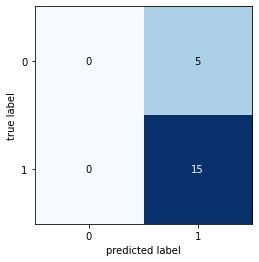

In [86]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [87]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



#### Find f1 score

In [88]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.42857142857142855

In [177]:
import pandas as pd
   
# List1
#data.head() 
#pdToList = list(data['text'])

col_one_list = data['Comment'].tolist()
col_one_arr = data['Comment'].to_numpy()
#print(f"\ncol_one_list:\n{col_one_list}\ntype:{type(col_one_list)}")

   
# List2
polarity = predicted
   
# get the list of tuples from two lists and merge them by using zip().
list_of_tuples = list(zip(col_one_list, polarity))
   
 
 
# Converting lists of tuples into pandas Dataframe
df = pd.DataFrame(list_of_tuples,
                  columns = ['comments', 'polarity'])
    
#Print comments and their polarity
df

#data.head()



,comments,polarity
0,I can't even say china should be ashamed.becau...,-1
1,Each nation should take action against China. ...,-1
2,What a brave woman!!,-1
3,Praying shes still alive. Salute to these brav...,-1
4,"This is stupid because it was made in 2019 ,an...",-1
5,Why. How come UK colonise India for 2 hundreds...,-1
6,🔥,-1
7,So you are the one that discovered the delta v...,-1
8,I'm getting tired of this. It's like having sa...,-1
9,She is missing? She is dead along with million...,-1


## Summary

There are various ways to perform sentiment analysis on textual data, here we used 5 of those techniques on YouTube videos' title and comment data of news channel, which I expected to have extreme polarity and sentiments.
